<a href="https://colab.research.google.com/github/daniyal9538/CNG562/blob/master/CNG562_HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get Dependencies

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeRegressor as tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from IPython.display import clear_output

#Get Data

The data was downloaded from a google sheets file. The way that i have downloaded the data is that i added the file to my google drive and downloaded it from there. The google sheets file can be obtained from [here](4/JwHf8PzHpvtyFO5-oUcHNigpo6Vp5MtYVqNlx_u3BO0hpG8P6NluN40). Add this file to your google drive to access the data.

In [0]:
!pip install --upgrade -q gspread

In [3]:
from google.colab import auth
auth.authenticate_user()
import numpy as np
import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('uci-forestfires').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)
dtype = {'X': np.uint8, 'Y': np.uint8, 'Month': object , 
         'Day': object, 'FFMC': np.uint16, 'DMC': np.uint16 , 
         'DC': np.uint16, 'ISI': str, 'temp': str, 
         'RH': str, 'wind': str, 'rain': np.float16, 
         'area': np.float16, }
# Convert to a DataFrame and render.
import pandas as pd
data = pd.DataFrame.from_records(rows,coerce_float=False)

[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], ['7', '5', 'mar', 'fri', '86.2', '26.2', '94.3', '5.1', '8.2', '51', '6.7', '0', '0'], ['7', '4', 'oct', 'tue', '90.6', '35.4', '669.1', '6.7', '18', '33', '0.9', '0', '0'], ['7', '4', 'oct', 'sat', '90.6', '43.7', '686.9', '6.7', '14.6', '33', '1.3', '0', '0'], ['8', '6', 'mar', 'fri', '91.7', '33.3', '77.5', '9', '8.3', '97', '4', '0.2', '0'], ['8', '6', 'mar', 'sun', '89.3', '51.3', '102.2', '9.6', '11.4', '99', '1.8', '0', '0'], ['8', '6', 'aug', 'sun', '92.3', '85.3', '488', '14.7', '22.2', '29', '5.4', '0', '0'], ['8', '6', 'aug', 'mon', '92.3', '88.9', '495.6', '8.5', '24.1', '27', '3.1', '0', '0'], ['8', '6', 'aug', 'mon', '91.5', '145.4', '608.2', '10.7', '8', '86', '2.2', '0', '0'], ['8', '6', 'sep', 'tue', '91', '129.5', '692.6', '7', '13.1', '63', '5.4', '0', '0'], ['7', '5', 'sep', 'sat', '92.5', '88', '698.6', '7.1', '22.8', '40', '4', '0', '0'], ['7', '5', 'sep', 'sat', '92.5',

In [7]:
data = data.drop([0], axis=0)

data.columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
4,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0


In [12]:
data.dtypes

X        float32
Y        float32
month     object
day       object
FFMC     float32
DMC      float32
DC       float32
ISI      float32
temp     float32
RH       float32
wind     float32
rain     float32
area     float32
dtype: object

In [0]:
len(data)

517

In [0]:
data['X'] = data.X.astype('float32')
data['Y'] = data.Y.astype('float32')
data['FFMC'] = data.FFMC.astype('float32')
data['DMC'] = data.DMC.astype('float32')
data['DC'] = data.DC.astype('float32')
data['ISI'] = data.ISI.astype('float32')
data['temp'] = data.temp.astype('float32')
data['RH'] = data.RH.astype('float32')
data['wind'] = data.wind.astype('float32')
data['rain'] = data.rain.astype('float32')
data['area'] = data.area.astype('float32')

In [10]:
data.dtypes

X        float32
Y        float32
month     object
day       object
FFMC     float32
DMC      float32
DC       float32
ISI      float32
temp     float32
RH       float32
wind     float32
rain     float32
area     float32
dtype: object

In [11]:
data.isnull().values.any()

False

The data is converted into the right object types. There are 517 datapoints in the dataset and no null/missing values

#Data Analysis

##Categorical Data

The only categorical data in the dataset is the months and the days. Regression modelling is much more sensitive to feature selection/engineering. It is important to take into consideration if the categorical data is best to not be used a feature

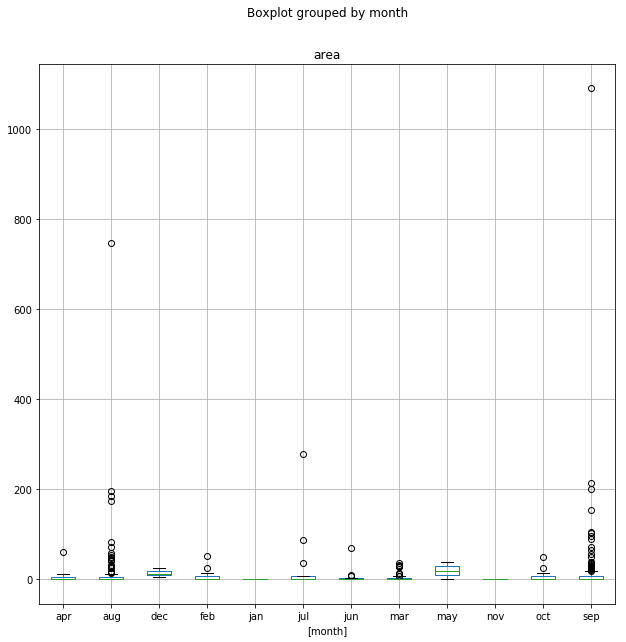

In [19]:
data.boxplot(column=['area'], by=['month'], figsize=(10,10))

The numbers of observations fall into every months are very unbalanced. In fact many months only have few observations. This introduce a great risk of overfitting.

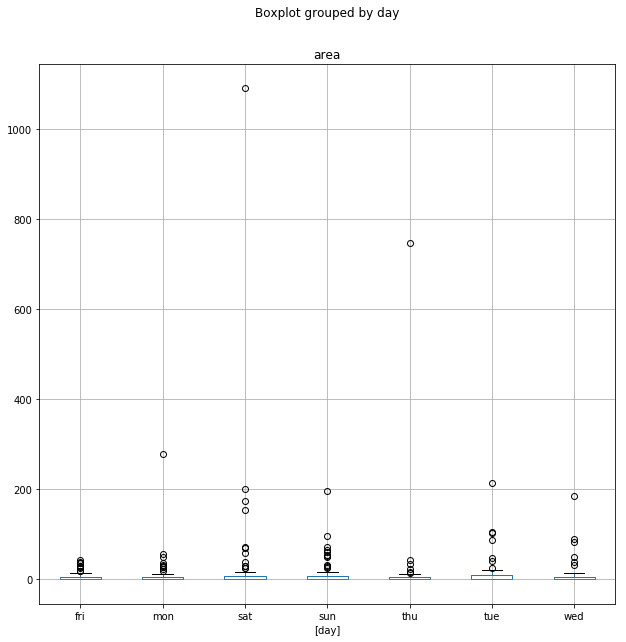

In [20]:
data.boxplot(column=['area'], by=['day'], figsize=(10,10))

There is no obvious relationship between the burned area and the days of week
It is best to not use these data points as it might add unwanted noise .

##Numerical Data

It is important to determine the existence of any kind of relationship between the target value and the feature sets.

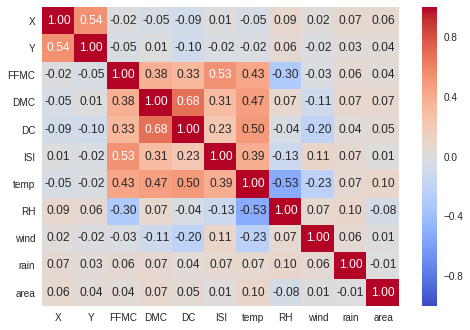

In [22]:
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59fb8d0860>,
      dtype=object)

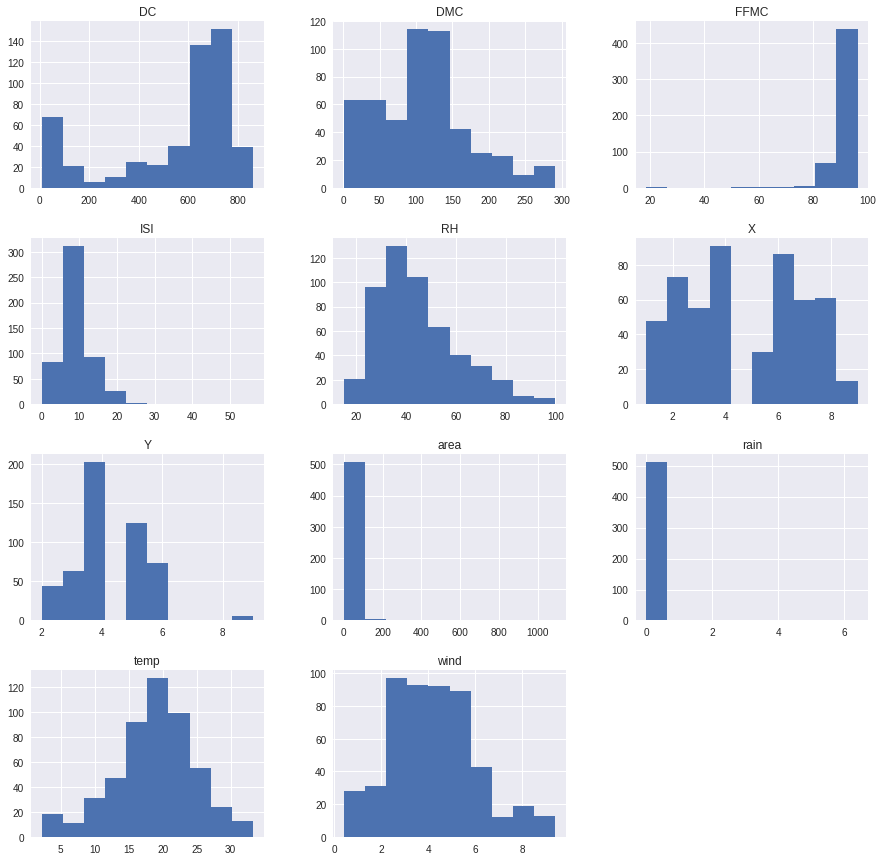

In [23]:
data.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59f88b1898>,
      dtype=object)

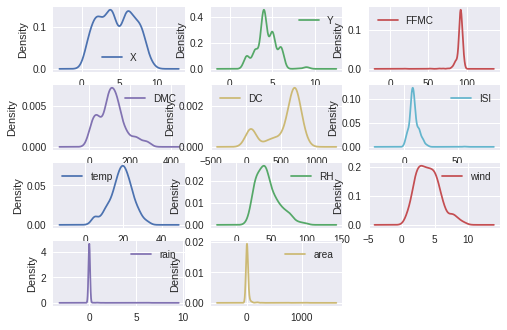

In [32]:
data.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False)

temp has approximately Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


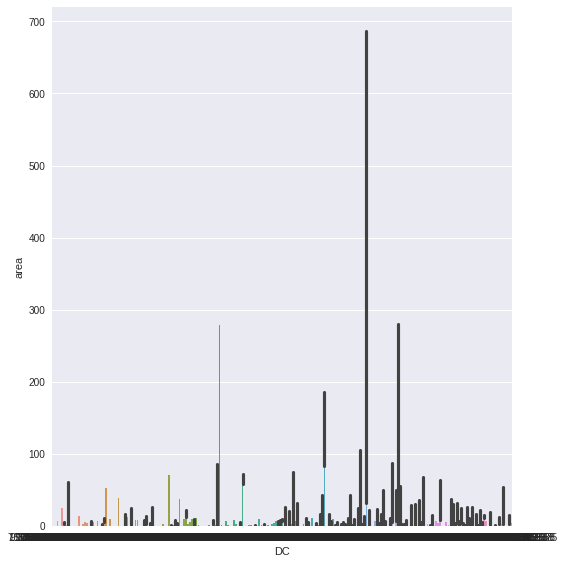

In [28]:
sns.factorplot(x="DC",y="area",data=data,kind="bar",size =8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


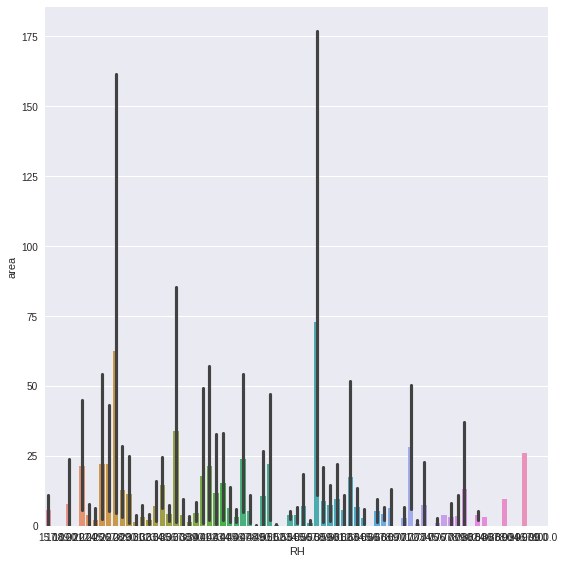

In [27]:
sns.factorplot(x="RH",y="area",data=data,kind="bar",size =8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


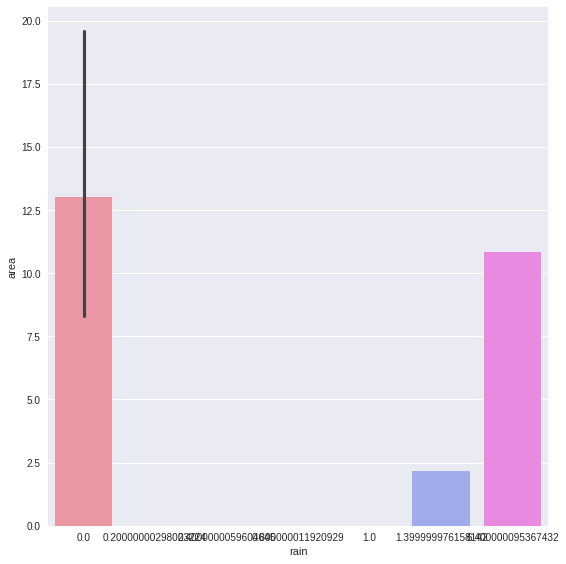

In [26]:
sns.factorplot(x="rain",y="area",data=data,kind="bar",size =8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


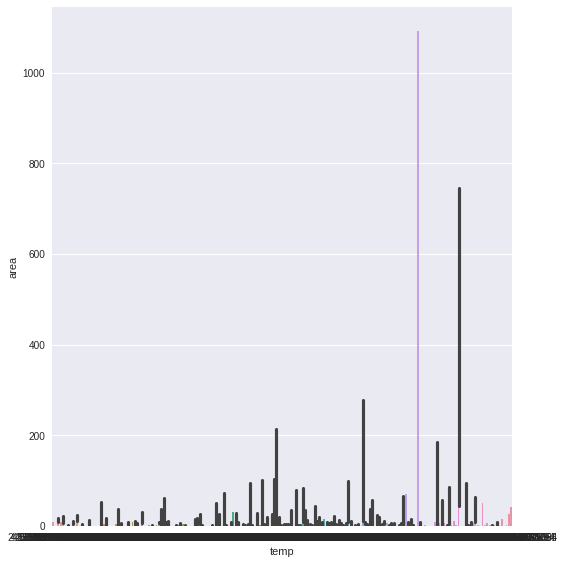

In [24]:
sns.factorplot(x="temp",y="area",data=data,kind="bar",size =8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


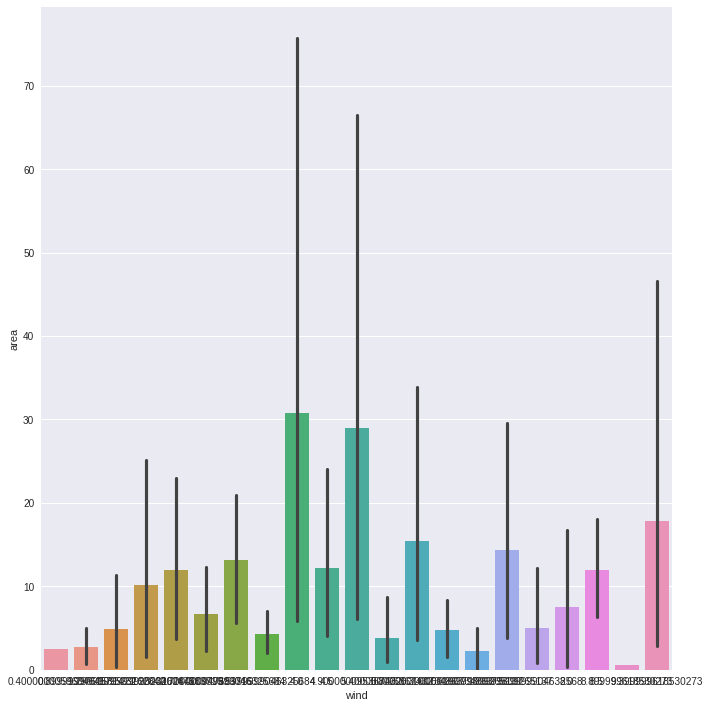

In [25]:
sns.factorplot(x="wind",y="area",data=data,kind="bar",size = 10)

It has hard to see any direct relationships between any of the features and target value. Simple multiple/linear regression will not produce a good result. Maybe polynomial regression would fare better. Task requires feature engineering, but feature engineering was not mentioned in the problem, hence it is out of the scope of this excercise

#Prepare Data

First need to standardize/normalize all numerical data, will use standard scaller from sklearn. Normalizes data(fits to normal curve) with mean U and standard deviation S calculated from dataset

In [120]:
df=pd.DataFrame()
df = data.drop(columns=['month', 'day', 'area']).reset_index(drop=True)
scaler = StandardScaler()
columns = ['X', 'Y',  'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']
sData = scaler.fit_transform(df)

fData = pd.DataFrame(sData, columns=columns)
fData['area']=data['area'].reset_index(drop=True)
fData.head().T

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4
X,0.750000,0.750000,0.750000,0.875000,0.875000
Y,0.428571,0.285714,0.285714,0.571429,0.571429
FFMC,0.870968,0.927742,0.927742,0.941935,0.910968
DMC,0.086492,0.118194,0.146795,0.110958,0.172984
DC,0.101325,0.775419,0.796294,0.081623,0.110590
ISI,0.090909,0.119430,0.119430,0.160428,0.171123
temp,0.192926,0.508039,0.398714,0.196141,0.295820
RH,0.423529,0.211765,0.211765,0.964706,0.988235
wind,0.700000,0.055556,0.100000,0.400000,0.155556
rain,0.000000,0.000000,0.000000,0.031250,0.000000


In [0]:

fDataY = pd.DataFrame(fData['area'])
fDataX = pd.DataFrame(fData.drop('area', axis=1))
X_train, X_test, y_train, y_test = train_test_split( fDataX, fDataY, test_size=0.2, random_state=42)

#Fit Data

The performance of each model will be calculated by using R^2 score of each model when given the test data.

##Linear Regression

In [112]:
lr = linear_model.LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
score_lr = lr.score(X_test, y_test)
score_lr

0.002360170884547874

Simple linear regression performs very poorly. Lets try to do polynomial regression by constructing a design input matrix of degree i.

###Polynomial Regression

In [0]:
test_values=[]
train_values = []

for i in range (0, 4):
  poly = PolynomialFeatures(degree=i)
  pX_test = poly.fit_transform(X_test)
  pX_train = poly.fit_transform(X_train)
  lr.fit(pX_train, y_train)
  test_values.append(lr.score(pX_test, y_test))
  train_values.append(lr.score(pX_train, y_train))

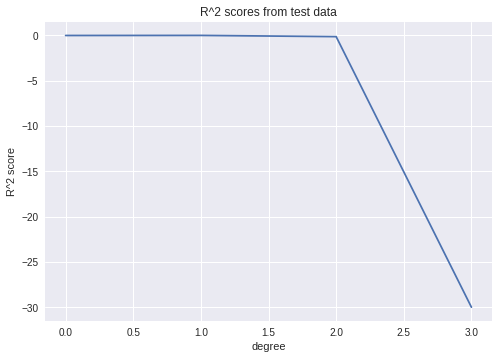

In [101]:
plt.plot(test_values)
plt.ylabel('R^2 score')
plt.xlabel('degree')
plt.title('R^2 scores from test data')
plt.show()

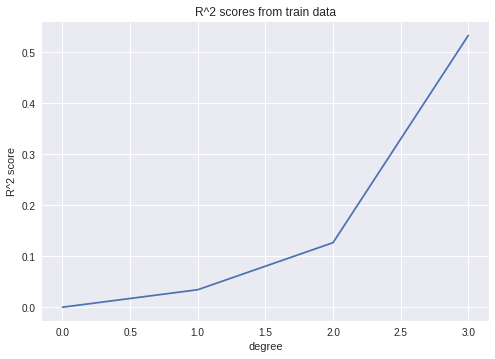

In [96]:
plt.plot(train_values)
plt.ylabel('R^2 score')
plt.xlabel('degree')
plt.title('R^2 scores from train data')
plt.show()

polynomial regression overfits alot, linear regression performs better, we shall continue with linear regression

###Cross Validation

In [105]:
cross_val_model = linear_model.LinearRegression(fit_intercept=True)
cv_scores_lr = cross_val_score(cross_val_model, fDataX,  fDataY, cv=5, verbose=True)
clear_output()
print(np.mean(cv_scores_lr))

-1.8710436916382214


In [107]:
#penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
fit_intercept =[True, False]
normalize = [True, False]
copy_X = [True, False]



params = dict(fit_intercept=fit_intercept, normalize = normalize, copy_X = copy_X)
clf = GridSearchCV(estimator=lr, param_grid = params,cv=5, verbose=True)
gs_lr = clf.fit(fDataX, fDataY)
clear_output()
gs_score_lr=gs_lr.score(X_test, y_test)
gs_score_lr

0.012285686970263443

In [108]:
print("Best estimator:", gs_lr.best_estimator_) 
print("Best parameters:", gs_lr.best_params_)
print("Best score:", gs_lr.best_score_)

Best estimator: LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)
Best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best score: -1.867269192485545


###Result

graph is really hard to read, but grid search predictably shows the best results.

Reason for poor performance

linear regression only models relationships between dependent and independent variables that are linear. It assumes there is a straight-line relationship between them which is incorrect sometimes. 

Linear regression is very sensitive to the anomalies in the data (or outliers).

Another disadvantage is that if we have a number of parameters than the number of samples available then the model starts to model the noise rather than the relationship between the variables.

Significant feature engineering/selection is needed for linear regression to perform well. Outliers within the dataset also need to be trimmed

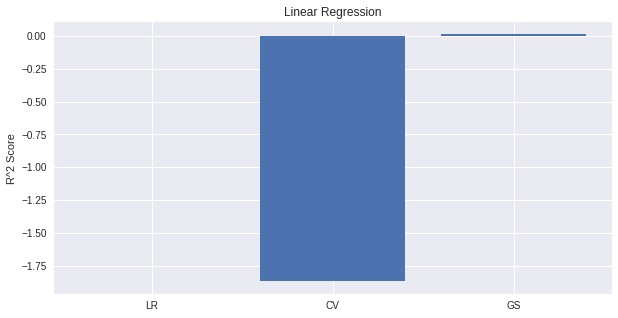

In [113]:
y = [score_lr, np.mean(cv_scores_lr), gs_lr.score(X_test, y_test)]
N = len(y)
x = ('LR', 'CV', 'GS')
plt.subplots(figsize=(10,5))
plt.bar(x, y)
plt.ylabel('R^2 Score')
plt.title('Linear Regression')
 
plt.show()

##Decision Tree Regressor

In [121]:
dt = tree()
dt.fit(X_train, y_train)
score_dt = lr.score(X_test, y_test)
score_dt

0.002360170884547874

In [123]:
cross_val_model = tree()
cv_scores_dt = cross_val_score(cross_val_model, fDataX,  fDataY, cv=5, verbose=True)
clear_output()
print(np.mean(cv_scores_dt))

-9.304526378354124


In [0]:
#penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
splitter =['best', 'random']

max_depth =(np.floor((np.linspace(5, np.sqrt(len(fData)), 5)))).astype(int)
min_samples_split  =(np.floor((np.linspace(5, np.sqrt(len(fData)), 5)))).astype(int)
min_samples_leaf  =(np.floor((np.linspace(5, np.sqrt(len(fData)), 5)))).astype(int)


params = dict(splitter=splitter, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf=min_samples_leaf)
clf = GridSearchCV(estimator=lr, param_grid = params,cv=5, verbose=True)
gs_lr = clf.fit(fDataX, fDataY)
clear_output()
gs_score_lr=gs_lr.score(X_test, y_test)
gs_score_lr